# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

### Import libraries


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, load_digits
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

import xgboost as xgb

from utils.plottings import plot_learning_curve
from utils.helpers_Garden import visualize_tree, plot_tree_interactive, randomized_tree_interactive, visualize_classifier

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (25.0, 10.0)
sns.set()

## Exercises

Classify the digit dataset with a decision tree such that your classifier is in overfit.

1. Show that actually the classifier overfits data.
2. Play with hyperparameters in order to improve the model performances on test set.
3. Apply ensemble methods (Random Forest or the explicit bagging classifier) to show how these reduce overfit and increase test accuracy.

__NOTE__: you should get a final accuracy above the $95\%$.

---

### Proposed Solution

First of all we load data out of the sklearn datasets.

In [2]:
digits = load_digits() # load the digits dataset

We split the dataset in train and test with an $80/20$ ratio.

In [3]:
X = digits.data # load the data into X
y = digits.target # load the labels into y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the data into training and testing sets

#### Decision tree classifier

We take the decision tree classifier without any tuning to avoid overfit.

In [4]:
tree = DecisionTreeClassifier() # create a decision tree classifier
tree.fit(X_train, y_train) # fit the training data to the classifier

DecisionTreeClassifier()

We can show this is in overfit by comparing for example train and test accuracy.

In [5]:
print(f"Train accuracy is {tree.score(X_train, y_train):.2f}") # print the accuracy of the classifier on the training data
print(f"Test accuracy is {tree.score(X_test, y_test):.2f}") # print the accuracy of the classifier on the testing data

Train accuracy is 1.00
Test accuracy is 0.86


Furthermore, we can plot learning curves.

In [6]:
train_sizes = [1, 100, 500, 900, 1100, 1231] # For our case, we use these six sizes.
train_sizes, train_scores, validation_scores = learning_curve(estimator = DecisionTreeClassifier(),
                                                            X = X_train,
                                                            y = y_train, train_sizes = train_sizes, cv = 7,
                                                            scoring = 'accuracy')

In [7]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       1.0
100     1.0
500     1.0
900     1.0
1100    1.0
1231    1.0
dtype: float64

 --------------------

Mean validation scores

 1       0.101600
100     0.631934
500     0.791908
900     0.822553
1100    0.847566
1231    0.846910
dtype: float64


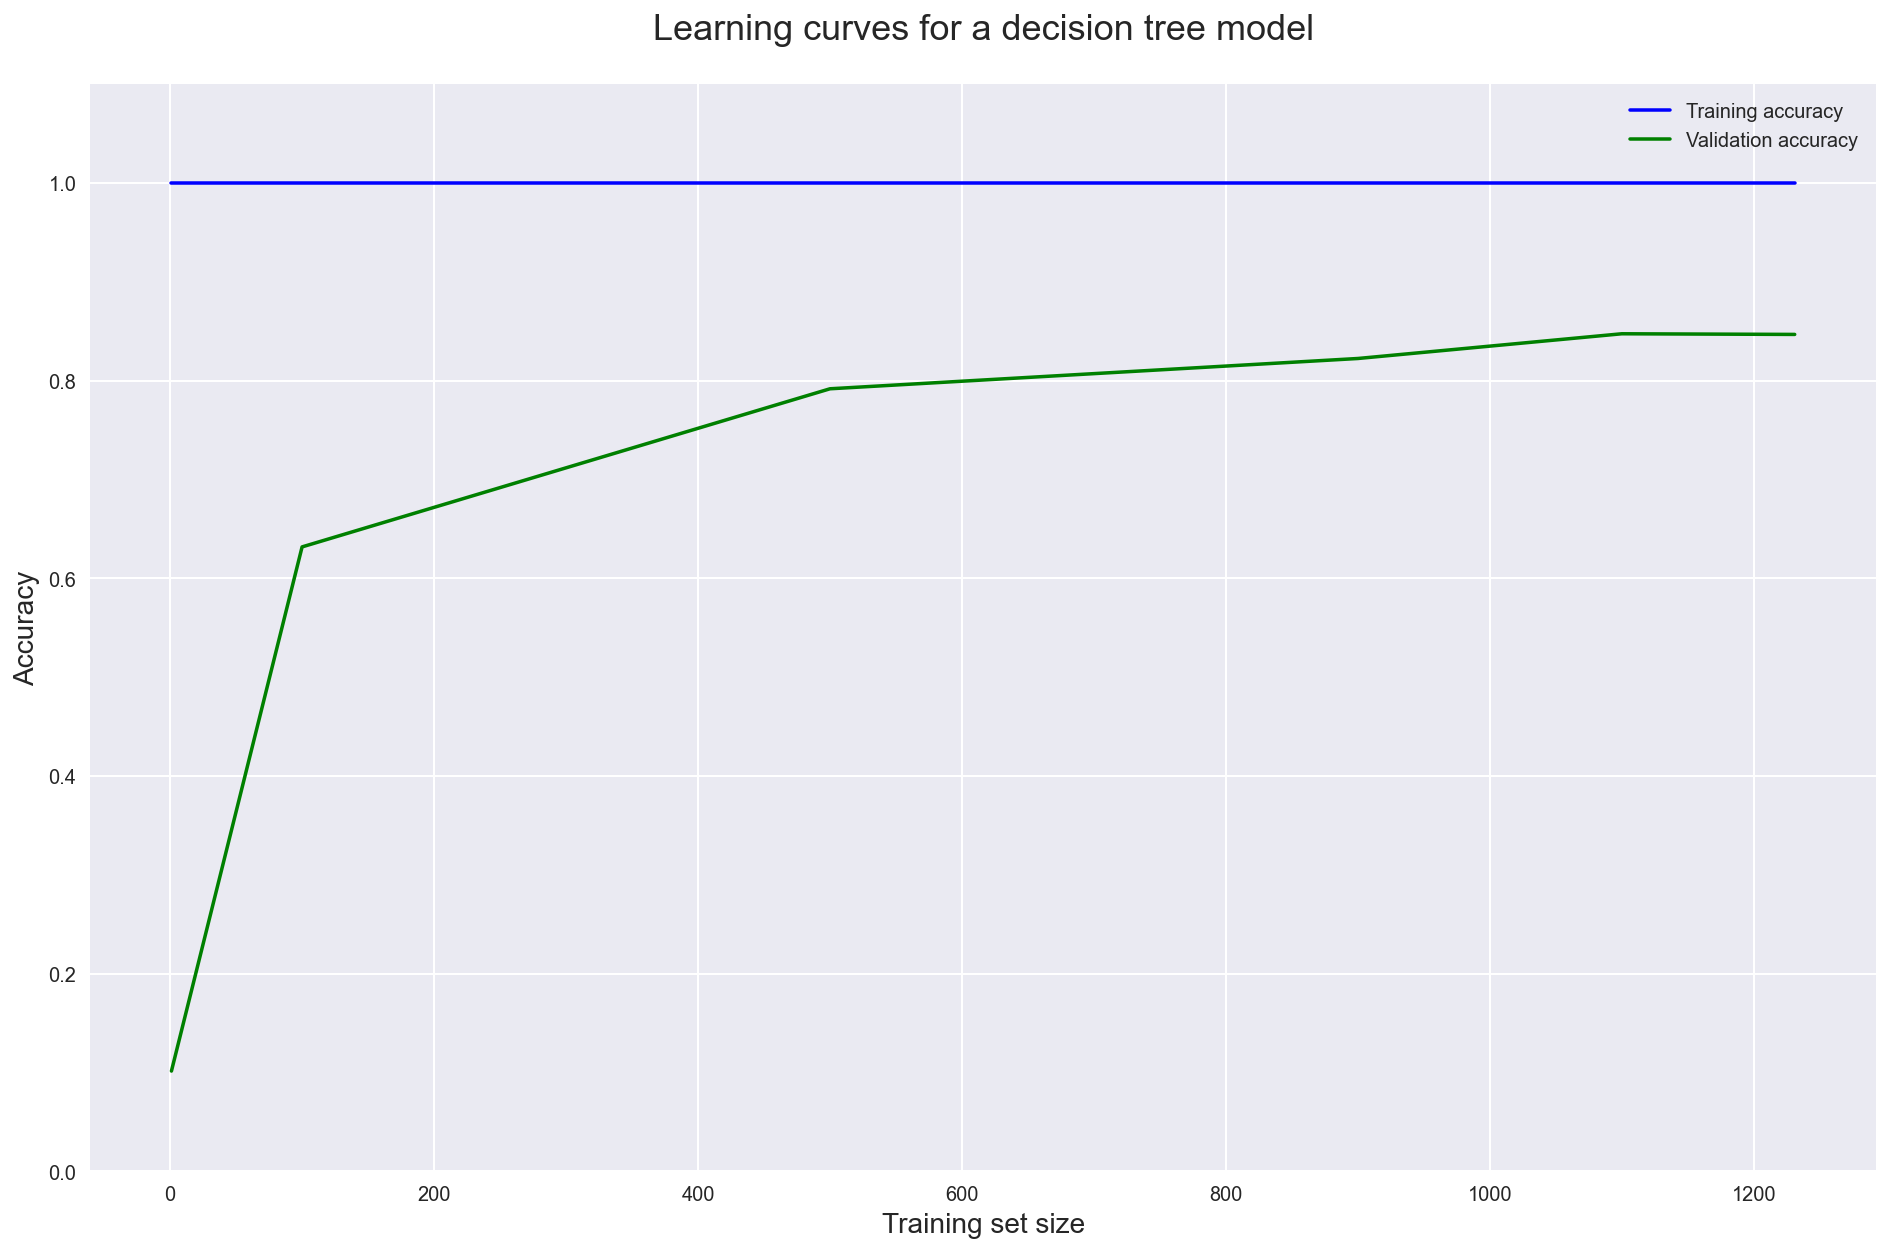

In [8]:
plt.style.use('seaborn')
plt.figure(figsize = (16,10))
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy', color = 'blue')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy', color = 'green')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a decision tree model', fontsize = 18, y = 1.03)
plt.ylim(0,1.1)
plt.legend();

Finally, classification report.

In [9]:
print(classification_report(y_test, tree.predict(X_test))) # print the classification report

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.79      0.79      0.79        28
           2       0.87      0.79      0.83        33
           3       0.78      0.91      0.84        34
           4       0.83      0.87      0.85        46
           5       0.93      0.83      0.88        47
           6       0.92      1.00      0.96        35
           7       0.88      0.85      0.87        34
           8       0.81      0.73      0.77        30
           9       0.78      0.88      0.82        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



Let's tune the decision tree hyperparameters in order to reduce overfit.

One thing we can do is operating on pruning.

In [10]:
tree = DecisionTreeClassifier(max_depth = 9, ccp_alpha=0.001, random_state=1) # create a decision tree classifier with a max depth of 9 and a CpCp_alpha of 0.001
tree.fit(X_train, y_train) # fit the training data to the classifier

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, random_state=1)

Let's see how this affected train and test accuracy.

In [11]:
print(f"Train accuracy is {tree.score(X_train, y_train):.2f}") # print the accuracy of the classifier on the training data
print(f"Test accuracy is {tree.score(X_test, y_test):.2f}") # print the accuracy of the classifier on the testing data

Train accuracy is 0.94
Test accuracy is 0.86


We improved slightly improved the test accuracy, however we can do better with ensemble methods.

#### Random Forest

First, we create a random forest classifier putting together $100$ trees. 
Hence, we show how this sensibly increases test accuracy also fighting the overfit.

In [12]:
randomforest = RandomForestClassifier(n_estimators=100) # create a random forest classifier
randomforest.fit(X_train, y_train) # fit the training data to the classifier

RandomForestClassifier()

Let's see how this algorithm has a greater test accuracy with respect to its base estimator.

In [13]:
print(f"Train accuracy is {randomforest.score(X_train, y_train):.2f}") # print the accuracy of the classifier on the training data
print(f"Test accuracy is {randomforest.score(X_test, y_test):.2f}") # print the accuracy of the classifier on the testing data

Train accuracy is 1.00
Test accuracy is 0.97


Great imporvement! 🙂

Let's see learning curves both for accuracy and $F_1$ score.

In [14]:
train_sizes = [1, 100, 500, 900, 1100, 1231] # For our case, we use these six sizes.
train_sizes, train_scores, validation_scores = learning_curve(estimator = RandomForestClassifier(),
                                                            X = X_train,
                                                            y = y_train, train_sizes = train_sizes, cv = 7,
                                                            scoring = 'accuracy')

In [15]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       1.0
100     1.0
500     1.0
900     1.0
1100    1.0
1231    1.0
dtype: float64

 --------------------

Mean validation scores

 1       0.101600
100     0.878901
500     0.958239
900     0.972866
1100    0.972159
1231    0.972856
dtype: float64


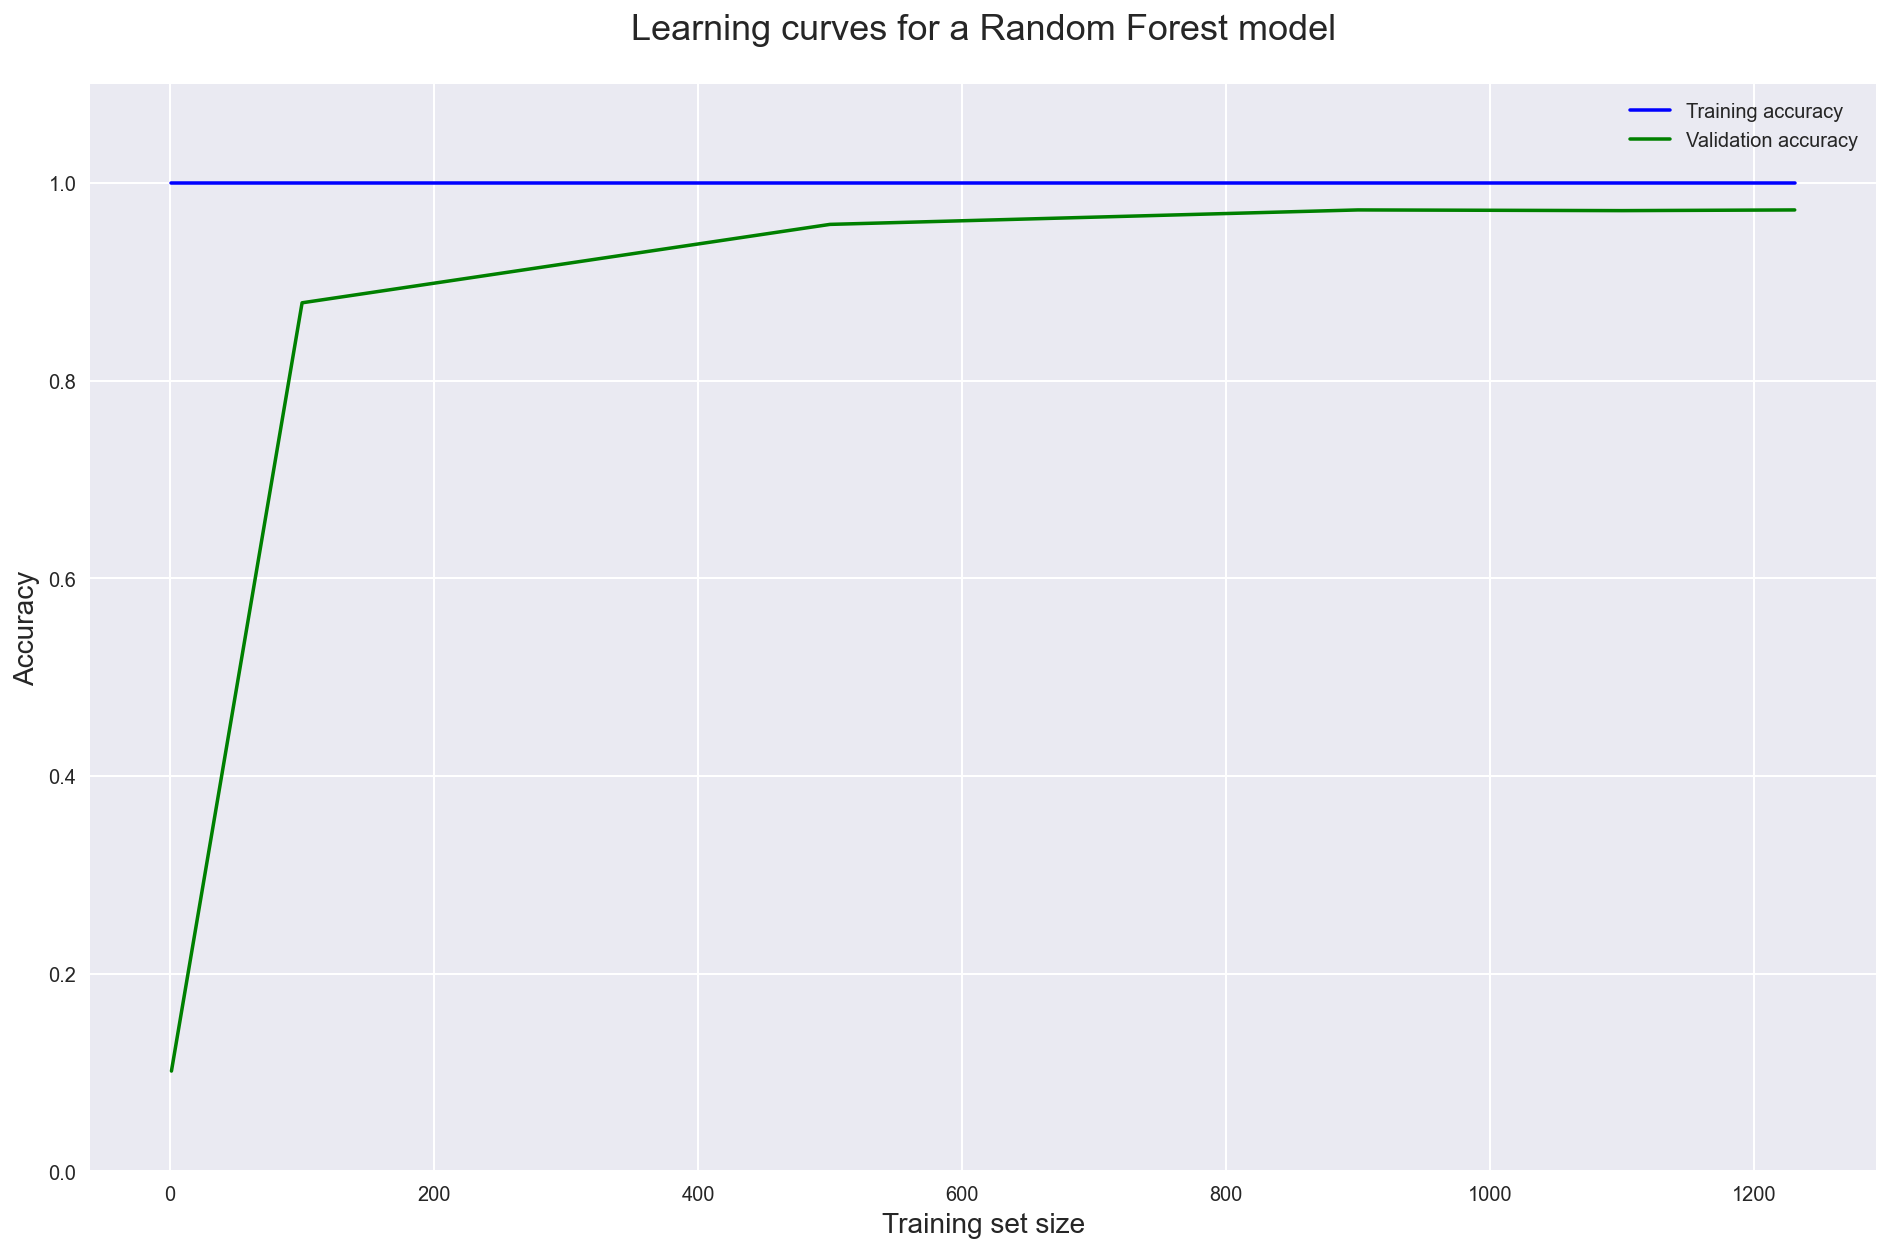

In [16]:
plt.style.use('seaborn')
plt.figure(figsize = (16,10))
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy', color = 'blue')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy', color = 'green')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.ylim(0,1.1)
plt.legend();

In [17]:
train_sizes = [1, 100, 500, 900, 1100, 1231] # For our case, we use these six sizes.
train_sizes, train_scores, validation_scores = learning_curve(estimator = RandomForestClassifier(),
                                                            X = X_train,
                                                            y = y_train, train_sizes = train_sizes, cv = 7,
                                                            scoring = 'f1_micro')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

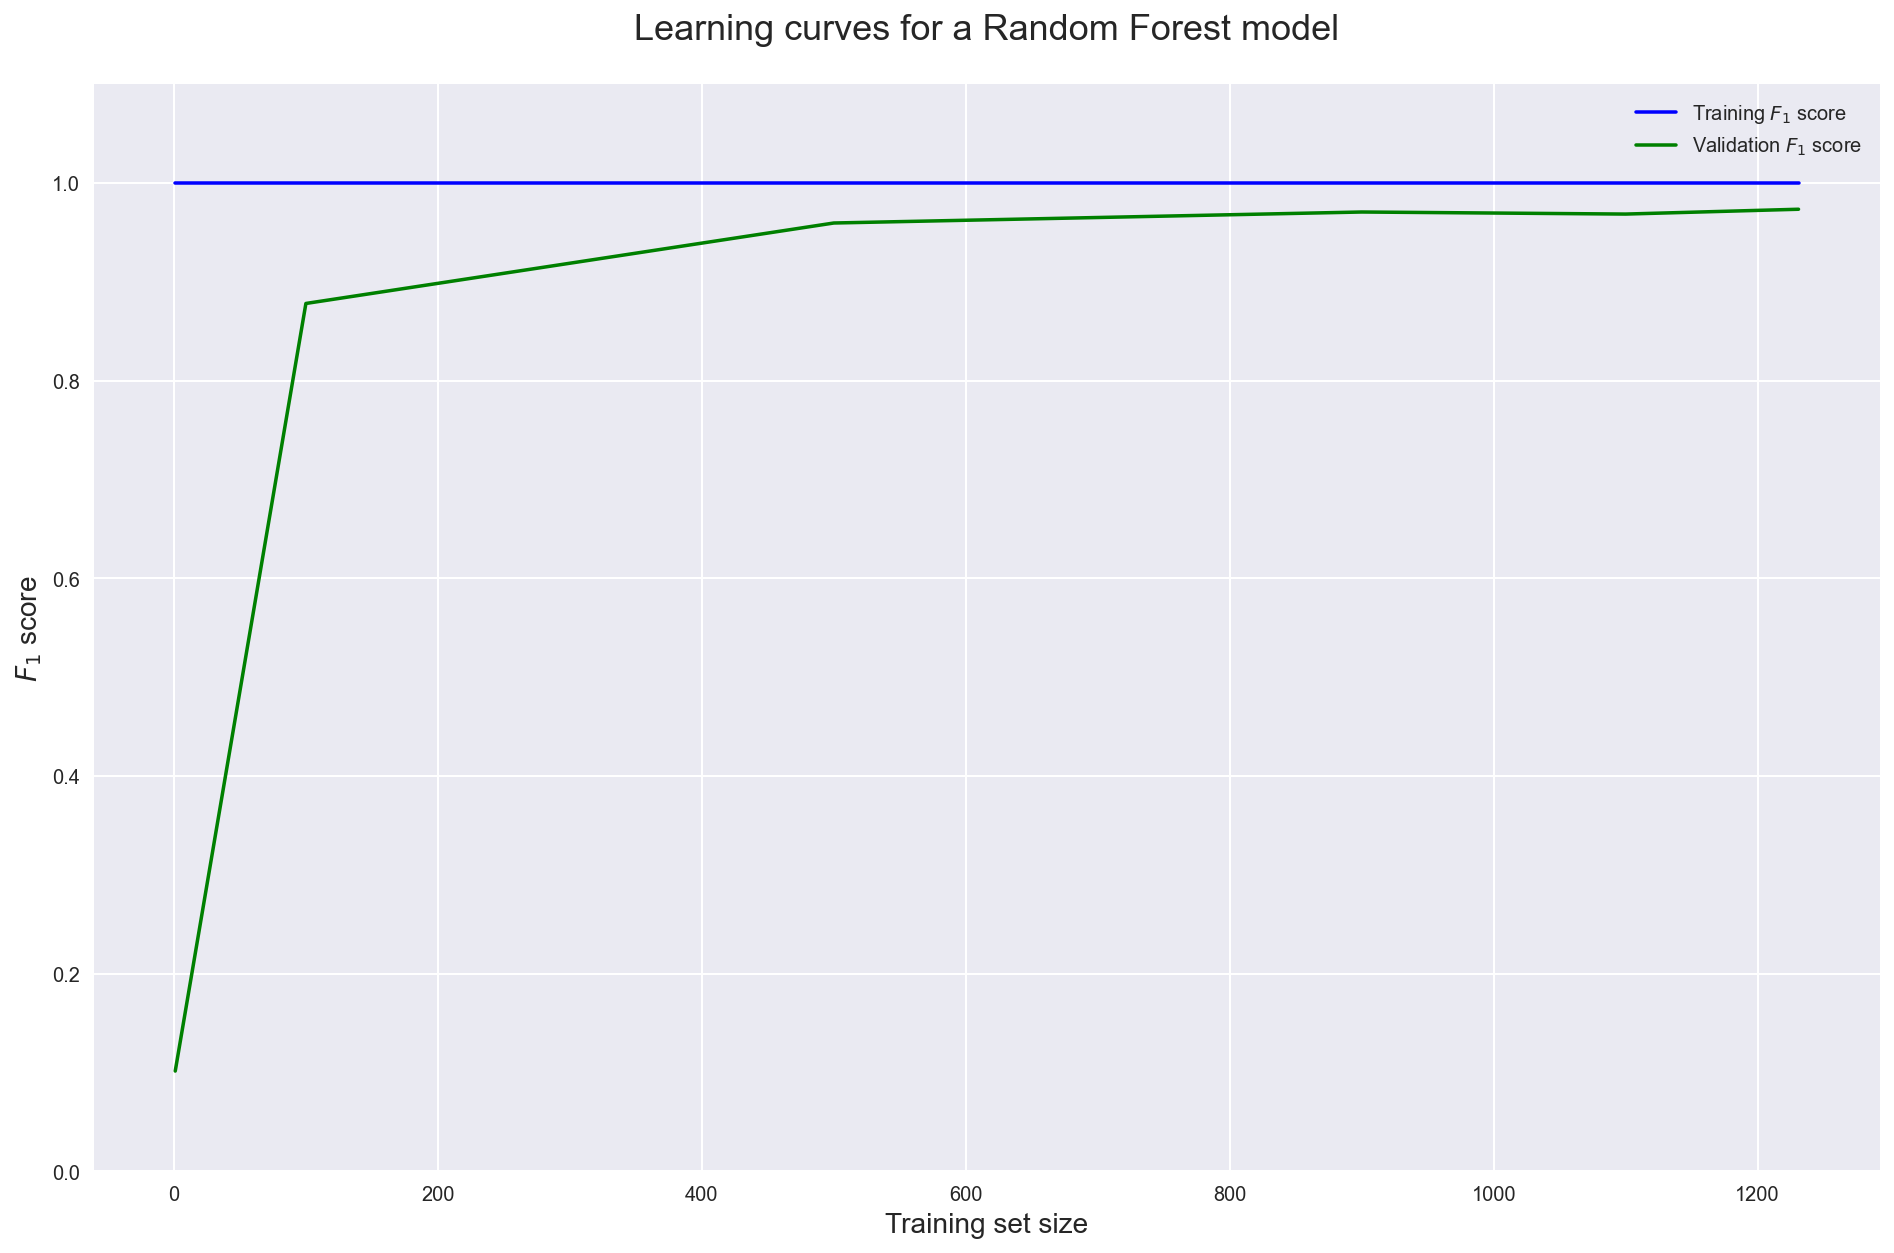

In [18]:
plt.style.use('seaborn')
plt.figure(figsize = (16,10))
plt.plot(train_sizes, train_scores_mean, label = r"Training $F_1$ score", color = 'blue')
plt.plot(train_sizes, validation_scores_mean, label = r'Validation $F_1$ score', color = 'green')
plt.ylabel(r'$F_1$ score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.ylim(0,1.1)
plt.legend();

And finally classification report.

In [19]:
print(classification_report(y_test, randomforest.predict(X_test))) # print the classification report

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.93      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Final comment

We have seen how with bagging technique we can really improve our model results, sometimes a lot further than with hyperparameter tuning.

---

### Exercise 2

Predict the churn rate with the xgboost classifier.

Here, you will be working with churn data. This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up.

Download the dataset [here](https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/churn_data.csv)

1. Write pipelines for preprocessing
2. Perform the right choices for hyperparameters.
3. Verify that your model does not overfits data. Measure the right metrics to justify your answers.

__NOTE__: you should get a final accuracy above the $95\%$.

In [20]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/churn_data.csv')

In [21]:
churn_data.rename({'month_5_still_here': 'churn'}, axis = 1, inplace = True)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_dist                     50000 non-null  float64
 1   avg_rating_by_driver         49799 non-null  float64
 2   avg_rating_of_driver         41878 non-null  float64
 3   avg_inc_price                50000 non-null  float64
 4   inc_pct                      50000 non-null  float64
 5   weekday_pct                  50000 non-null  float64
 6   fancy_car_user               50000 non-null  bool   
 7   city_Carthag                 50000 non-null  int64  
 8   city_Harko                   50000 non-null  int64  
 9   phone_iPhone                 50000 non-null  int64  
 10  first_month_cat_more_1_trip  50000 non-null  int64  
 11  first_month_cat_no_trips     50000 non-null  int64  
 12  churn                        50000 non-null  int64  
dtypes: bool(1), floa

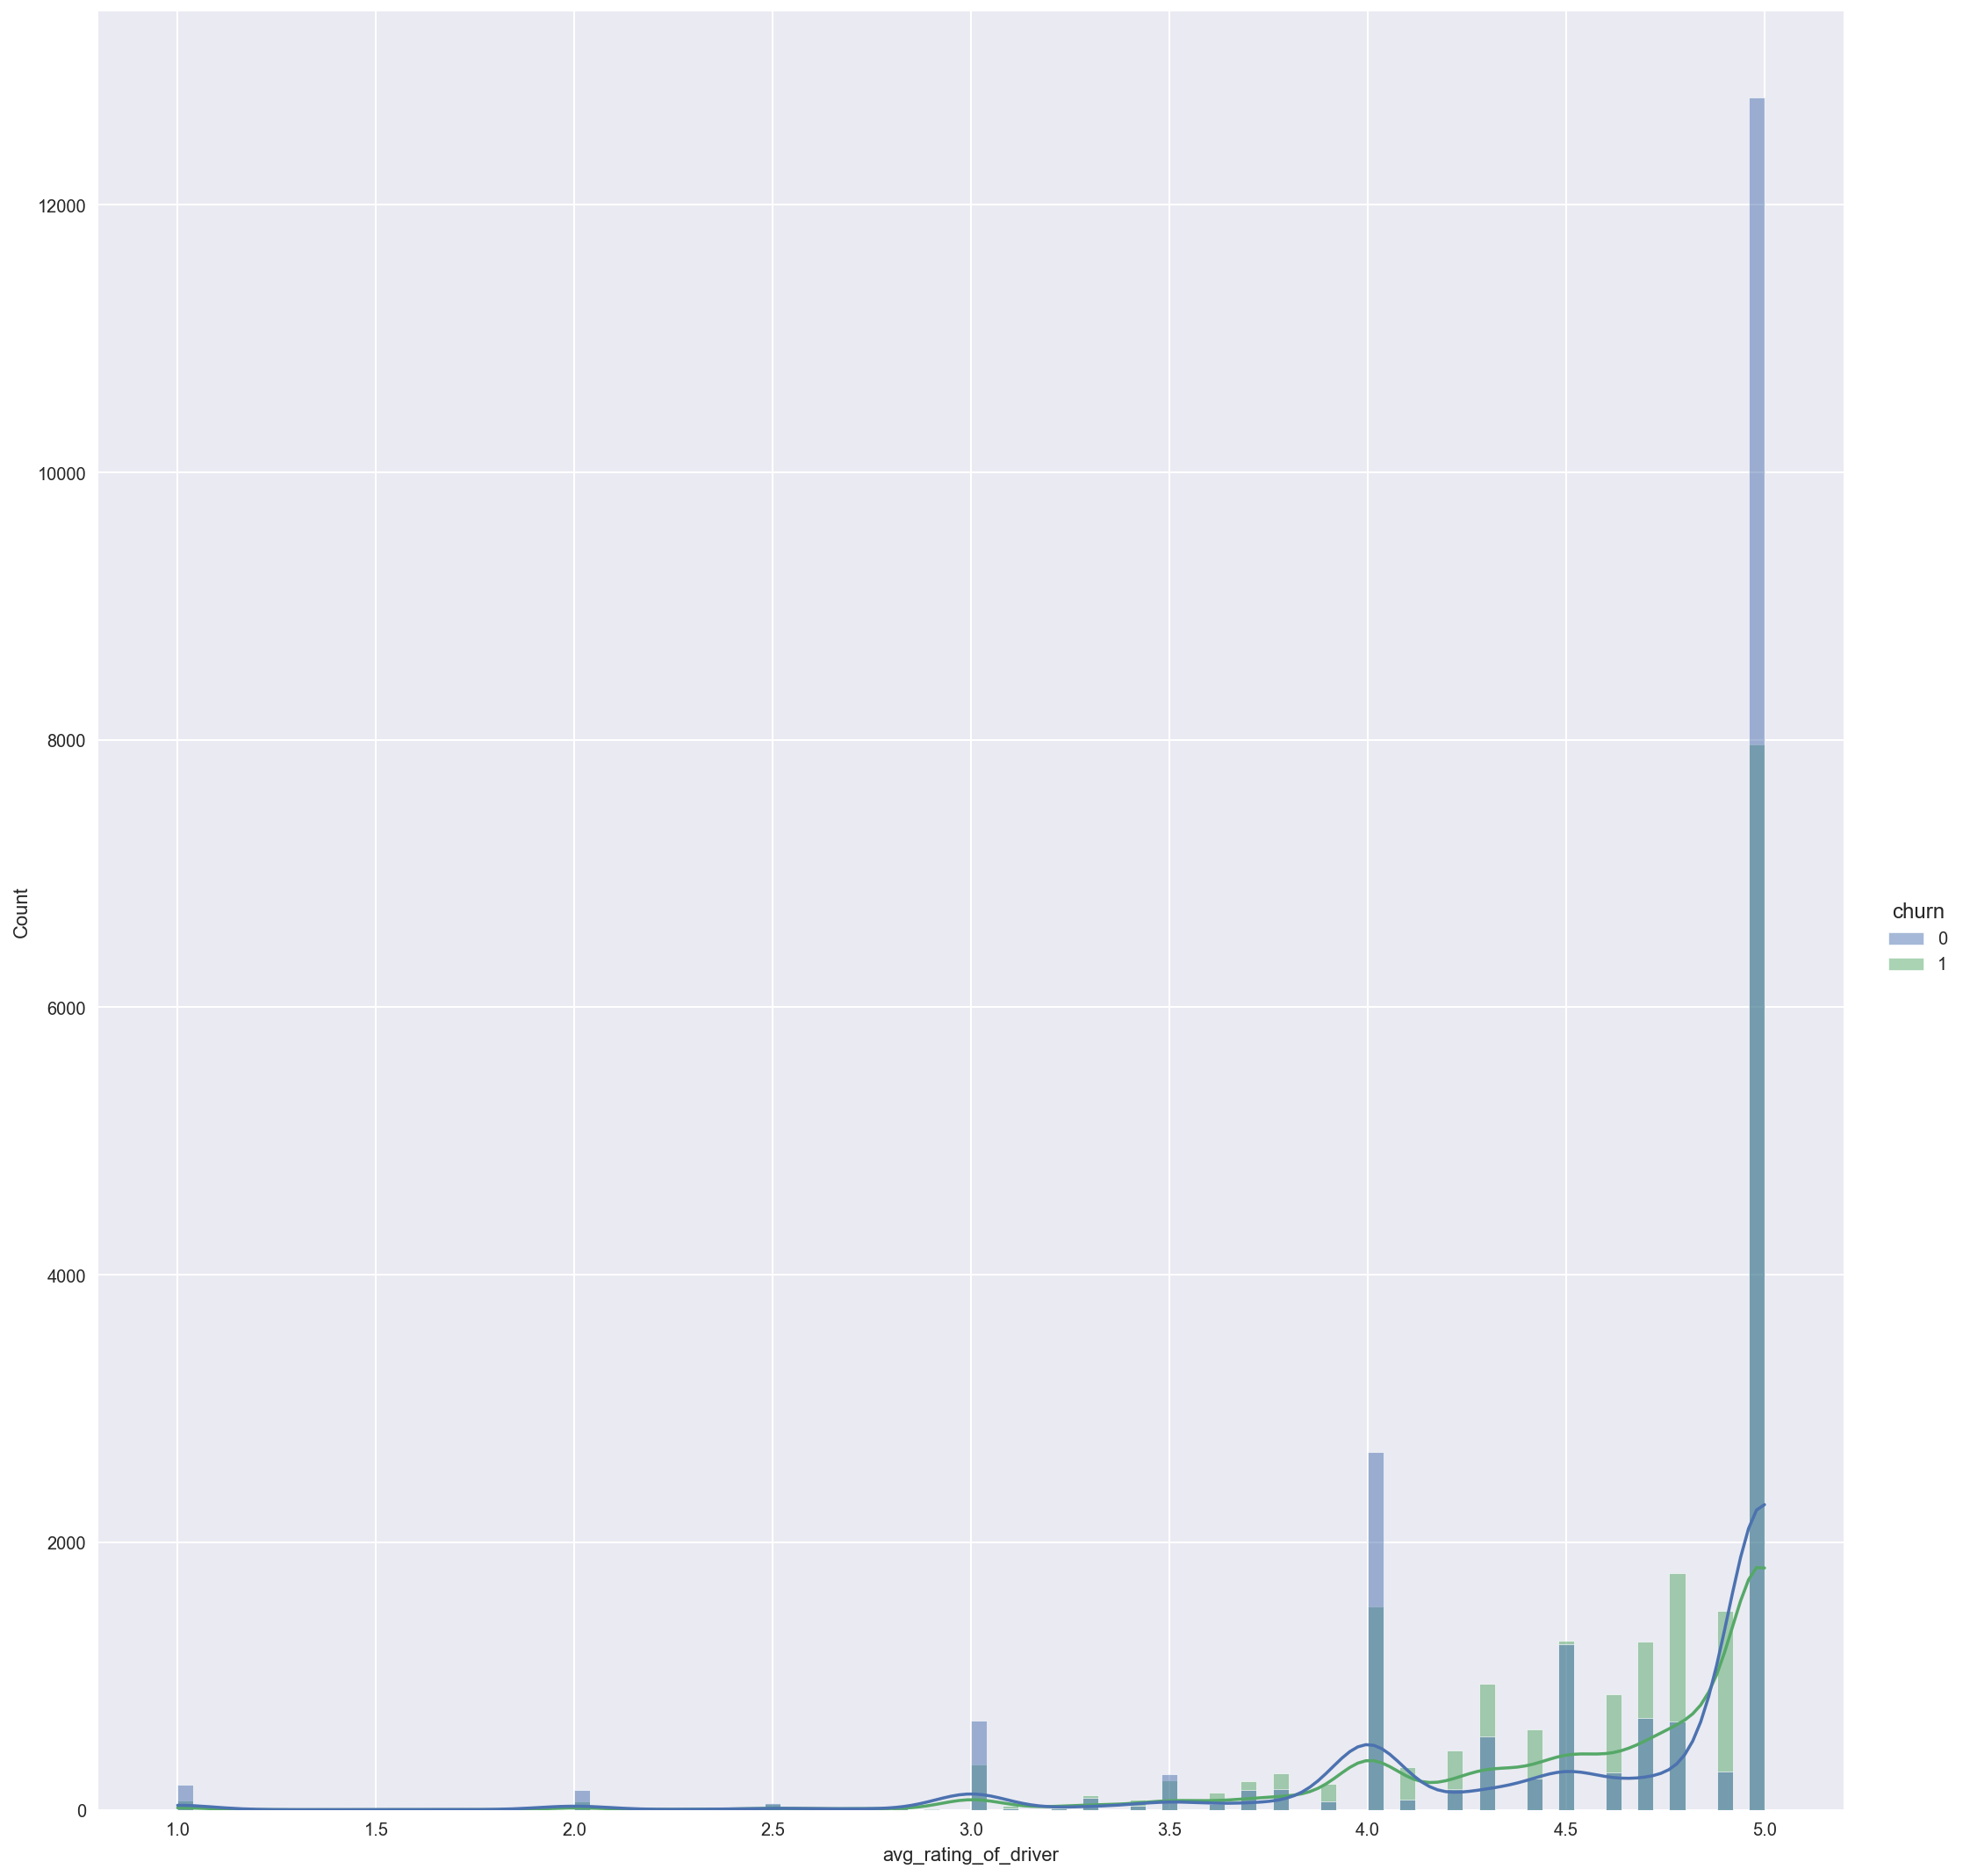

In [22]:
# Example: average rating of the driver
sns.displot(
    data = churn_data, hue = 'churn', kind="hist", kde=True,
    x="avg_rating_of_driver", height=15);

In [23]:
churn_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,churn
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,60.926084,0.330680,0.202600,0.691640,0.410040,0.307800,0.449880
std,5.707357,0.446652,0.617338,0.222336,19.958811,37.081503,0.470463,0.401941,0.461821,0.491846,0.461588,0.497487
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,66.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see scales are different. We need to rescale data.

In [24]:
# Create arrays for the features and the target: X, y
X, y = churn_data.drop("churn", axis=1), churn_data.churn

In [25]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [26]:
# Baseline model
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print(f"Accuracy of the model: {accuracy}")
print(f"Classification report: \n{classification_report(y_test, preds)}")

Accuracy of the model: 0.7582
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5440
           1       0.76      0.69      0.72      4560

    accuracy                           0.76     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.76      0.76     10000



Let's rescale data by a pipeline.

In [40]:
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="most_frequent")), 
           ("scale", StandardScaler())])

#categorical_pipeline = Pipeline(
#    steps=[("encode", OneHotEncoder())])

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, X.columns),
#        ("categorical", categorical_pipeline, categorical_cols)
    ]
)

#model_pipeline = Pipeline(
#    steps=[("preprocessing", full_processor),
#            ("model", LogisticRegression())
#            ]
#)


#model_pipeline.fit(X_train, y_train)

#y_pred = model_pipeline.predict(X_test)

X_train_processed = full_processor.fit_transform(X_train)
X_test_processed = full_processor.transform(X_test)

In [ ]:
# Model on rescaled data
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train_processed, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test_processed)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print(f"Accuracy of the model: {accuracy}")
print(f"Classification report: \n{classification_report(y_test, preds)}")

Accuracy of the model: 0.7557
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      5440
           1       0.76      0.69      0.72      4560

    accuracy                           0.76     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.76      0.75     10000



In [29]:
# Grid search for the best hyperparameters

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"max_depth": 5,
    "learning_rate":  0.1,
    "gamma": 1,
    "subsample": 0.8,
    "colsample_bytree": 0.5,
}

Perform CV

In [30]:
# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params,
                   nfold=3, num_boost_round=5,
                   metrics="error", as_pandas=True, seed=123)

# Pint cv_results
print(cv_results)

# Print the accuracy
print(((1 - cv_results['test-error-mean']).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.27759         0.001019          0.27902        0.000710
1           0.26205         0.006204          0.26384        0.005308
2           0.25790         0.008613          0.26068        0.005875
3           0.25585         0.010805          0.25942        0.008124
4           0.25117         0.008430          0.25416        0.007091
0.745840108998852


In [31]:
# Hyperparameter space grid
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9],
    "colsample_bytree": [0.5],
} # Hyperparameter space grid

In [32]:
# Careful: This might take a while.

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Random Search
rnd_cv = RandomizedSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = rnd_cv.fit(X_train, y_train)

In [33]:
joblib.dump(rnd_cv, "models/xgb_cl_rnd_cv.pkl");

In [34]:
rnd_cv.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 1,
 'reg_lambda': 1,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.25,
 'colsample_bytree': 0.5}

In [35]:
rnd_cv.best_score_

0.848144767495172

In [36]:
preds = rnd_cv.best_estimator_.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print(f"Accuracy of the model: {accuracy}")
print(f"Classification report: \n{classification_report(y_test, preds)}")

Accuracy of the model: 0.7617
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      5440
           1       0.76      0.70      0.73      4560

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

